In [126]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
os.chdir("/Users/anon/GitHubRepos/Kaggle/GraduateAdmissions/Data/")

In [128]:
graduate_data = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [129]:
graduate_data.shape

(500, 9)

### A quick description of the dataset features
GRE Score and TOEFL scores are self explanatory.
Rating of the University to which the application is being made (am assuming 5 is good)
SOP and LOR are Statement of Purpose and Letter of Recommendation respectively. Their goodness is quantified in a scale upto 5 (highest)
CGPA is the grade in the undergraduate studies (10 being highest)
Research experience is binary - Either yes (1) or no (0).
Target variable is the probability of admit (0 to 1)

In [130]:
graduate_data.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [131]:
## Dropping the Serial No column
graduate_data.drop(columns = 'Serial No.', inplace = True)

In [132]:
## check for missing values
## turns our there aren't any
graduate_data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Distribution of the variables

Some observations from the histograms of all the variables:
- The GRE scores are concentrate around the 320 mark and the lowest is around 290.
- Most of the students have TOEFL scores in the 100-110 range.
- Most of the students have average to good SOPs and LORs.
- CGPA is concentrated on the higher side with the mean around 8.5.
- Almost half the students do not have research experience.
- More than 40% feel they have a greater than 75% chance of getting an admit.


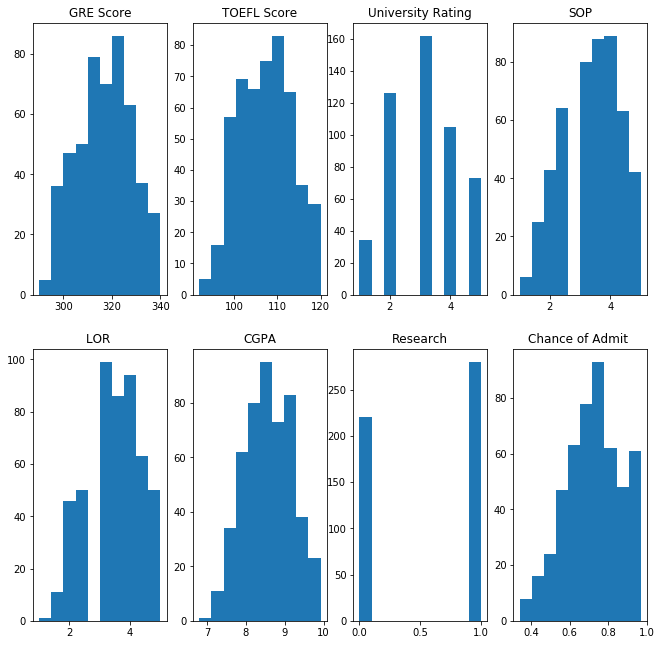

In [133]:
fig, ax = plt.subplots(2,4)
fig.set_size_inches(11,11)

k = 0
for i in range(0,2):
    for j in range(0,4):
        ax[i,j].hist(graduate_data.iloc[0:,k], bins = 10)
        ax[i,j].set_title(graduate_data.columns[k])
        k += 1
        #print(k)
        
plt.show()

In [135]:
# import seaborn as sns
# p = sns.pairplot(graduate_data)

# for i, j in zip(*np.triu_indices_from(p.axes,1)):
#     p.axes[i, j].set_visible(False)
# for ax in p.diag_axes: 
#     ax.set_visible(False) 

### Bi-variate relationship between the independent variables and the target
Pretty much conforms to established notions of the influence of various independent factors on the chances of admit.
- Higher the GRE and TOEFl scores - higher the chances of admit. 
- Better undergraduate University rating, better the chances of admit as is the case with SOP and LOR.
- Undergraduate CGPA clearly has a strong impact on the chances of admit - but the same cannot be said about the research experience.

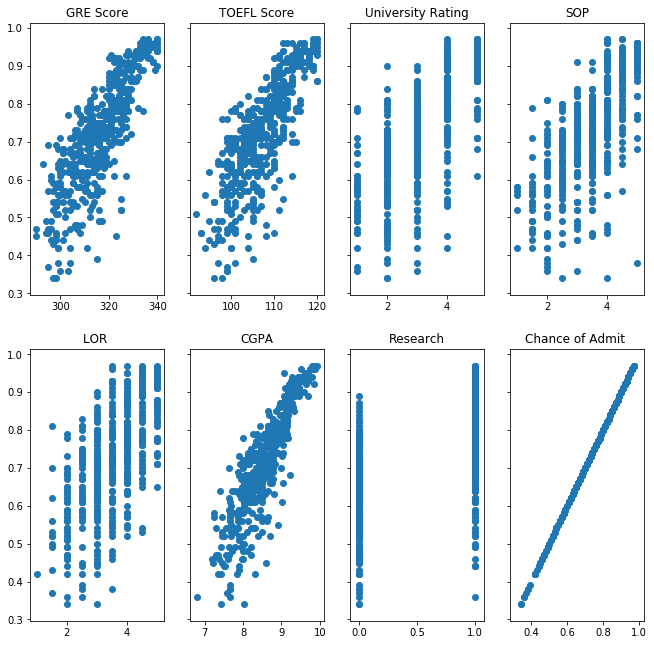

In [136]:
fig, ax = plt.subplots(2,4, sharey = 'row')
fig.set_size_inches(11,11)

k = 0
for i in range(0,2):
    for j in range(0,4):
        ax[i,j].scatter(graduate_data.iloc[0:,k],graduate_data.iloc[:,7])
        ax[i,j].set_title(graduate_data.columns[k])
        k += 1
        #print(k)
        
plt.show()


### Checking for correlation between variables

Some quick observations from the correlation plot:

- There is no negative correlation between any of the variables
- GRE scores and TOEFL scores are highly correlated
- GRE score has just a weak correlation with LOR and Research experience
- I was expecting a high correlation between LOR and CGPA - but not really the case
- More than GRE/ TOEFL, chances of admit is highly correlated with CGPA. Least correlated with Research experience

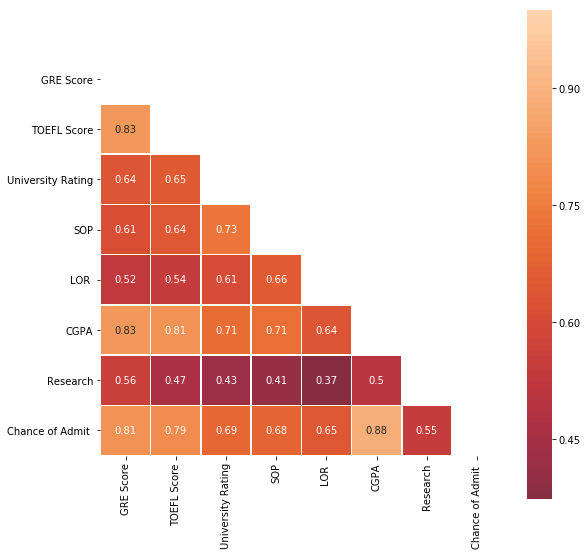

In [41]:
fig = plt.figure(figsize = (9,9))

corr_graduate = graduate_data.corr()
# Generate a mask for the upper right triangle of the square - one half is enough to convey the correlation 
## between the predictors
mask = np.zeros_like(corr_graduate, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate the correlation plot 
sns.heatmap(corr_graduate, mask = mask, center=0, annot = True, square=True, linewidths=.5)

plt.show()

### To check if there is a clear distinction in admit chances for different brackets of GRE/ TOEFL scores

To do this, the Admit chances have been binned into four quartiles. 

Some observations:
- The green lump at the top right is quite homogenous - i.e mostly composed of the top quartile of the admit chances.
- There are a few students in the second highest admit quartile but with relatively lesser TOEFL/ GRE scores. It would be interesting to find out the factor(s) which differentiates or gives these students a higher admit chance than students who have scored slightly better than them in GRE/ TOEFL.
- Anything less than 305/ 102 in GRE/ TOEFL, surely decreases the chances of admit.

In [137]:
##Binning the admit chances into four quartiles
#graduate_data['Admit_quartiles'] = pd.qcut(graduate_data['Chance of Admit '], 4, labels = ['low','medium','good','Almost there'])
graduate_data['Admit_quartiles'] = pd.qcut(graduate_data['Chance of Admit '], 4, labels = False)

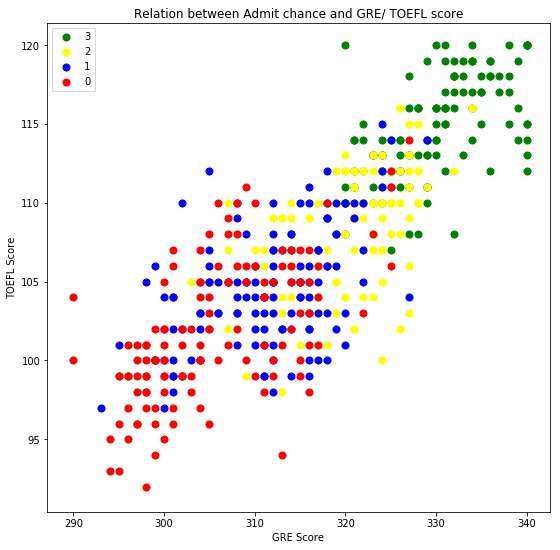

In [138]:
## Scatter Plot with GRE/ TOEFL scores on axes and the the admit chance quartiles as different quartiles
## The highest admit chance quartile is 3 which is mapped to Green and the lowest is 0 which is mapped to Red. 

color_dict = {0: 'red', 1: 'blue', 2: 'yellow', 3: 'green'}

fig, ax = plt.subplots()
fig.set_size_inches(9,9)
for quartile in graduate_data['Admit_quartiles'].unique():
    index = graduate_data.index[graduate_data['Admit_quartiles']==quartile]
    ax.scatter(graduate_data.loc[index,'GRE Score'], graduate_data.loc[index,'TOEFL Score'], 
               c = color_dict[quartile], label = quartile, s = 50)
ax.legend()
ax.set_xlabel("GRE Score")
ax.set_ylabel("TOEFL Score")
ax.set_title("Relation between Admit chance and GRE/ TOEFL score")
plt.show()




### To check if there is a clear distinction in admit chances for different brackets of University Rating/ CGPA
- Again a similar trend with high University Rating and high CGPA clearly increasing the chances of admit
- There are a few students though who despite their lower University Rating figure in the top quartile of Admits - possibly because of their high CGPA and may be high GRE/ TOEFL scores.

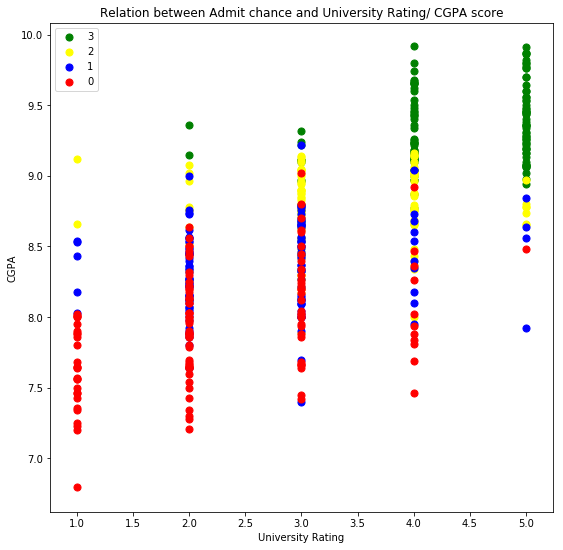

In [44]:
## Scatter Plot with University Rating/ CGPA on axes and the the admit chance quartiles as different quartiles
## The highest admit chance quartile is 3 which is mapped to Green and the lowest is 0 which is mapped to Red. 

color_dict = {0: 'red', 1: 'blue', 2: 'yellow', 3: 'green'}

fig, ax = plt.subplots()
fig.set_size_inches(9,9)
for quartile in graduate_data['Admit_quartiles'].unique():
    index = graduate_data.index[graduate_data['Admit_quartiles']==quartile]
    ax.scatter(graduate_data.loc[index,'University Rating'], graduate_data.loc[index,'CGPA'], 
               c = color_dict[quartile], label = quartile, s = 50)
ax.legend()
ax.set_xlabel("University Rating")
ax.set_ylabel("CGPA")
ax.set_title("Relation between Admit chance and University Rating/ CGPA score")
plt.show()

### If GRE/ TOEFL scores are low, can other factors increase your chances of admit?

A box plot of the Admit quartiles vis-a-vis the different variables is created - for students whose GRE/ TOEFL scores are less than 320 and 110 respectively but more than the minimum scores of the second best Admit quartile.

Observations:
- Considering only the second top admit quartile (as the top admit quartile has only two students in this low GRE/ TOEFL score group), we find that barring Research experience (or the lack of it), all the other factors are better for the students with higher admit chances compared to the the lower admit chance students.
- (The university rating box plot for students in Admit quartile 2 is just a line without a box as the entire interquartile range is composed of the median value 3 - encountering such a box plot for the first time)

In [45]:
min_GREscore_Admit2 = graduate_data[graduate_data['Admit_quartiles']==2]['GRE Score'].min()
min_TOEFLscore_Admit2 = graduate_data[graduate_data['Admit_quartiles']==2]['TOEFL Score'].min()

lower_score_analysis = graduate_data.loc[(graduate_data['GRE Score']<320)&(graduate_data['TOEFL Score']<110)&(graduate_data['GRE Score']>min_GREscore_Admit2)&(graduate_data['TOEFL Score']>min_TOEFLscore_Admit2)]

In [46]:
#lower_score_analysis.sort_values(by = 'Admit_quartiles')

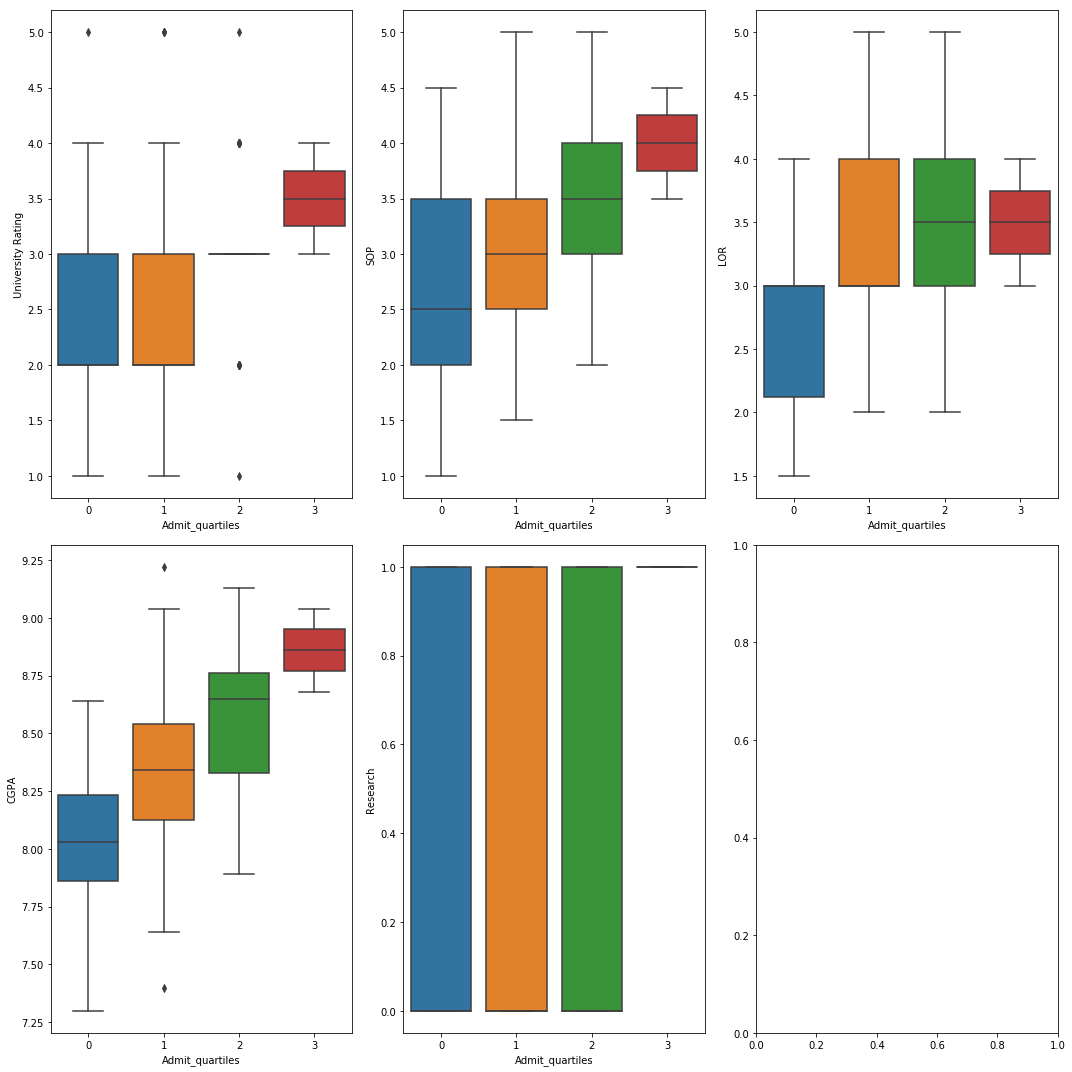

In [47]:
fig, axes = plt.subplots(2, 3, figsize = (15,15))
axes = axes.flatten()

#2,3,4,5,6 indicates the column indexes of the columns which we are interested in analysing
for i in [2,3,4,5,6]:
    sns.boxplot(x="Admit_quartiles", y=lower_score_analysis.iloc[:,i], data=lower_score_analysis, orient='v', ax=axes[i-2])

plt.tight_layout()
plt.show()

### Let us test some assumptions aka hypothesis

<b>Hypothesis 1: </b> The means of the GRE scores of the student group in Admit quartile 3 (top) is statistically different from the means of the GRE scores of the student group in Admit quartile 2.

The two sample t-test compares the means of the two sample groups. The null hypothesis here is that there is no statistical difference in the means of the two score groups and the alternate hypothesis is that there is a statistically significant difference between the scores of the two groups.

With a significance level of 1% (there is a less than 1% chance thst the difference between the two means is due to random chance), we find that the null hypothesis is rejected.

In [48]:
from scipy import stats
#from statsmodels.stats import weightstats as stests

In [153]:
def t_test_fn(group1, group2, **kwargs):
    ttest, pval = stats.ttest_ind(group1,group2, **kwargs)
    
    if pval<0.01:
        result = "reject null hypothesis"
    else:
        result = "accept null hypothesis"
    #print(result)
    return(ttest, pval, result)

In [156]:
GRE_scores_group1 = graduate_data.loc[graduate_data['Admit_quartiles']==3,'GRE Score'].tolist()
GRE_scores_group2 = graduate_data.loc[graduate_data['Admit_quartiles']==2,'GRE Score'].tolist()

t_stat, p_value, result = t_test_fn(GRE_scores_group1, GRE_scores_group2, equal_var = False)
print("T statistic is ",t_stat)
print("Probability of getting this T statistic due to random chance ",p_value)
print(result)

T statistic is  12.56305822735193
Probability of getting this T statistic due to random chance  2.7048653078011477e-28
reject null hypothesis


<b>Hypthesis 2: </b> Since, Research is the least correlated with the chances of admit, we would want to check if there is a statistical difference in the means of Research experience between the groups in the top 2 admit quartiles. 

But it turns out there is a statistical difference in Research experience between the two groups and the Null Hypothesis is rejected.

Extending the same test to the bottom two quartiles of Admit chances, the p-value is no more significant and hence we fail to reject the Null Hypothesis - showing that in the bottom two Admit quartiles, there is no statistical difference in the Research experience of the two groups.

In [158]:
Research_group1 = graduate_data.loc[graduate_data['Admit_quartiles']==3,'Research'].tolist()
Research_group2 = graduate_data.loc[graduate_data['Admit_quartiles']==2,'Research'].tolist()

t_stat, p_value, result = t_test_fn(Research_group1, Research_group2, equal_var = False)
print("T statistic is ",t_stat)
print("Probability of getting this T statistic due to random chance ",p_value)
print(result)

T statistic is  5.3441904454302405
Probability of getting this T statistic due to random chance  2.7963822131346004e-07
reject null hypothesis


In [161]:
Research_group1 = graduate_data.loc[graduate_data['Admit_quartiles']==1,'Research'].tolist()
Research_group2 = graduate_data.loc[graduate_data['Admit_quartiles']==0,'Research'].tolist()

t_stat, p_value, result = t_test_fn(Research_group1, Research_group2, equal_var = False)
print("T statistic is ",t_stat)
print("Probability of getting this T statistic due to random chance ", p_value)
print(result)

T statistic is  2.0242563617955556
Probability of getting this T statistic due to random chance  0.044025928116254914
accept null hypothesis


### Linear Regression

Before we attempt Linear Regression, a quick summary of what Linear Regression is all about.

Assuming we have some data points which has some independent variables and a target variable - can we come up with an equation (of the form y = ax + b) to explain the relationship between the various predictors and the target variable - that in a nutshell is Linear regression.

Lets tinker with the equation a little more using our Graduate data example albeit only the GRE score and Chances of Admit.

The population for this data is effectively all the students in the world who would attempt for a Masters in the US by writing GRE and assuming GRE scores does have an impact on the admit, we can say,

<center><b>$ Y $ (Chances of Admit) $= A * X $(GRE Scores) $+ B + Error $ </b></center>

The reason for having the error term is because GRE scores are not the sole criteria for the admit chances and there might be other factors which our simple model has not accounted for or just plain random error which cannot be explained by any factor - and hence the Error term.

The other terms - A and B are the co-efficient of the Score variable and the intercept constant respectively. These are unknown to us. 

Now, in this specific case, we just have a handful (sample) of the data of students who are attempting for a US college Masters. And to model the data as a straight line relation between the GRE scores of our sample and the chances of Admit, we need to make good estimates of the population co-efficients (A and B).

<center><b>$ y(est) = A(est) * x + B(est) $</b></center>

These estimates of the co-efficients are arrived at by minimizing the sum of the square of the errors where the error is the difference between our prediction of Y and the actual Y. 

The same concept can be extended to multiple Linear regression where we attempt to model a relationship between more than one independent variable and the target variable. Instead of fitting a line in a two dimensional space, a hyperplane is fit on the n+1 dimensional space where n is the number of predictors.

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler

In [200]:
graduate_data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ', 'Admit_quartiles'],
      dtype='object')

In [247]:
X = graduate_data.drop(['Chance of Admit ','Admit_quartiles'], axis = 1)
y = graduate_data['Chance of Admit ']

### Splitting the data into training and testing with a 3:1 split

In [248]:
## The random state value helps in selecting the same samples for the train test split - so that we can validate 
## results over multiple runs with the same train/ test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 111)

### Fitting the Linear Regression model

In [249]:
grad_model = LinearRegression()

##Model training using the training data
grad_model.fit(X_train, y_train)

## using the fitted model to predict on the test data
grad_prediction = grad_model.predict(X_test)

## Getting the co-efficients of the independent variables and the intercept
print("The model coefficients are: ",grad_model.coef_)
print("The model intercept is: %.2f"%grad_model.intercept_)

## Finding how much of the variation in the Target variable is explained by our model
print('Target variation explained by model: %.2f' % r2_score(y_test, grad_prediction))

## Finding the error in the predictions
print('Mean squared error: %.3f' % mean_squared_error(y_test, grad_prediction))



The model coefficients are:  [ 0.00226755  0.00229293  0.0076484  -0.00018061  0.01847581  0.11299736
  0.02424166]
The model intercept is: -1.31
Target variation explained by model: 0.83
Mean squared error: 0.004


### Interpreting the Regression co-efficients

The co-efficient of an independent variable signifies the average change (increase or decrease depending on the sign of the co-efficient) in the dependent variable for an unit change in the independent variable keeping all other independent variables constant. <br> For example, in our model equation, the co-efficient of CGPA is 0.11 - for every unit increase in the CGPA, there is an average increase of 0.11 in the chances of admit. 

### Plotting the Errors

We interpreted the Regression co-efficients. But before we trust the regression co-efficients, we need to make a couple of simple checks. One is creating residual plots based on the prediction errors made by the model (also known as residuals) and the other is checking the p-values of the regression co-efficients. <br> <br>
The residual plot is created with the predicted or fitted values in the x-axis and the errors (actual values of the target variable and the predictions made) in the y-axis. This plot lets us know if the errors are random over the entire range of the fitted values or if there is any pattern to it. Ok. But why is a pattern not a good sign of a good model? Let us go back to the equation that we created: <br> <br>

<center><b>$ Y $ (Chances of Admit) $=$ Co-efficients $*$ Independent Variables $+ Error $ </b></center>

The idea is to create a model which can account for almost all the variation in the dependent variable - except the random component. If there is a pattern in our residual plot, then it means some of the predictable variation in the target variable is yet to be accounted for by our model. For example, let us assume that we did not consider CGPA in our model - and let us also assume that for two students with the same high GRE scores, the balance is tilted in favour of the student with the higher CGPA - then our residual plot will have a funnel shape with the big mouth towards the right of the x-axis (towards the higher values of the fitted values).

In our case, we do have a funnel in the residual plot - but with the big mouth towards the origin. At this moment, I'm not too sure if
- this is due to a missing variable or any other causes
- how to fix this issue

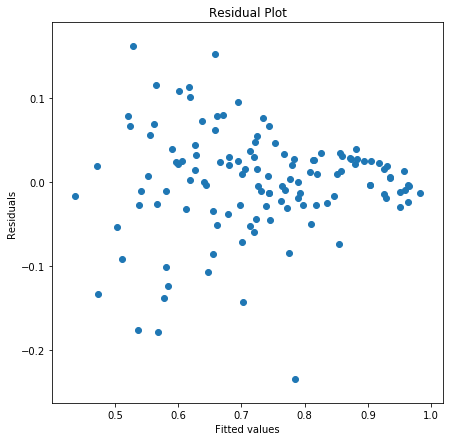

In [250]:
## finding the residuals - the difference between the actual target variable values and the predictions
residuals = y_test - grad_prediction

plt.figure(figsize = (7,7))
plt.scatter(grad_prediction, residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### Checking if the predictors are significant

statsmodels provides a more detailed analysis of the regression output. We will decipher some of the important terms in this result and also check the significance of the predictor variables. <br>

- R-squared: Simply, put R_squared quantifies the amount of variation in the target variable that is explained by the model. A very intuitive and graphical understanding of R_squared can be found in the book Regression basics by Leo Kahane. Our model is able to explain around 82% of the variation in the Chances of Admit variable.

- F-statistic: This is the result of the hypothesis testing to see if it is meaningful to build a model with all the explanatory variables to explain the variation in the target variable or if it is only as good (or bad) as an intercept only model. 

- Prob(F-statistic): This gives the probability of getting the F-statistic due to random chance. If it is very low (below a set significance level), then we can conclude that there is a statistically significant difference between our model and the intercept only model.

Understanding the observations in the table:
- the first column is the coefficient of that variable, 
- the second column is the standard error - basically how many standard deviations away is the mean of the co-efficient as compared to the true co-efficient value.
- t-statistic: Similar to the F-test - just that here the test is done one variable at a time with the intercept only model. 
- Prob(t): The probability of getting the t-statistic value due to random chance. If it is low, then we can conclude that our variable in question has a significant relationship :-) with the dependent variable. In our results, except SOP and University rating, all the other variables are significant.
- The last two columns are the confidence interval - the interval within which is the true value of the co-efficient. If the co-efficient estimate is outside this interval, then most likely that variable is not a significant predictor of the target variable.

In [257]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     237.5
Date:                Tue, 05 Feb 2019   Prob (F-statistic):          4.45e-132
Time:                        21:54:54   Log-Likelihood:                 529.10
No. Observations:                 375   AIC:                            -1042.
Df Residuals:                     367   BIC:                            -1011.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3118      0.122    -10.722      0.000      -1.552      -1.071
GRE Score             0.0023      0.001      3.927      0.000       0.001       0.003
TOEFL Score           0.0023      0.001      2.343      0.020       0.000       0.004
University Rating     0.0076      0.004      1.727      0.085      -0.001       0.016
SOP                  -0.0002      0.005     -0.034      0.973      -0.011       0.010
LOR                   0.0185      0.005      3.948      0.000       0.009       0.028
CGPA                  0.1130      0.011     10.198      0.000       0.091       0.135
Research              0.0242      0.007      3.281      0.001       0.010       0.039
==============================================================================
Omnibus:                       99.507   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.667
Skew:                          -1.306   Prob(JB):                     9.05e-53
Kurtosis:                       5.918   Cond. No.                     1.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [178]:
#r2_score(y_test, grad_prediction)
#mean_squared_error(y_test, grad_prediction)
#print("Mean squared error: %.3f" % mean_squared_error(y_test, grad_prediction))

In [251]:
X = graduate_data.drop(['Chance of Admit ','Admit_quartiles'], axis = 1)
y = graduate_data['Chance of Admit ']

In [243]:
X = graduate_data.drop(['Chance of Admit ','Admit_quartiles', 'SOP', 'University Rating'], axis = 1)
y = graduate_data['Chance of Admit ']

In [252]:
## The random state value helps in selecting the same samples for the train test split - so that we can validate 
## results over multiple runs with the same train/ test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 111)

In [253]:
standardizer = StandardScaler()
standardizer.fit(X_train)

/Users/anon/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [254]:
X_train_std = standardizer.transform(X_train)
X_test_std = standardizer.transform(X_test)

/Users/anon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/Users/anon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [255]:
grad_model = LinearRegression()

grad_model.fit(X_train_std, y_train)

grad_prediction = grad_model.predict(X_test_std)

grad_model.score(X_test_std, y_test)

0.8267506513725215

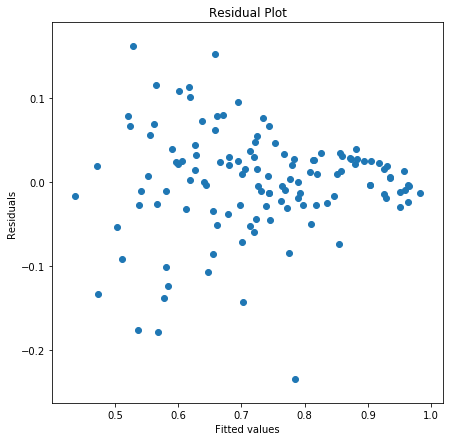

In [256]:
residuals = y_test - grad_prediction

plt.figure(figsize = (7,7))
plt.scatter(grad_prediction, residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [187]:
from sklearn.feature_selection import VarianceThreshold


In [188]:
thresholder = VarianceThreshold(threshold = 0.5)

In [189]:
X_high_variance = thresholder.fit_transform(X)

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X_high_variance, y, test_size = 0.25, random_state = 111)

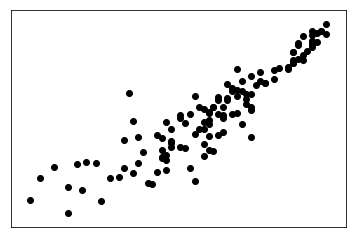

In [63]:
# Plot outputs
plt.scatter(y_test, grad_prediction,  color='black')
#plt.plot(grad_prediction, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


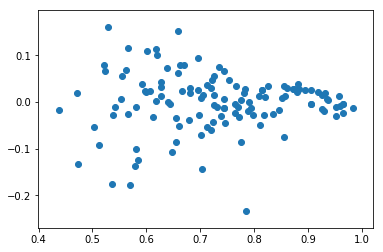

In [172]:
residuals = y_test - grad_prediction

plt.scatter(grad_prediction, residuals)
plt.show()

In [70]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X = poly.fit_transform(X)

In [69]:
X.shape

(500, 7)

In [105]:
#interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)
#X_inter = interaction.fit_transform(X)
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     330.5
Date:                Tue, 05 Feb 2019   Prob (F-statistic):          7.40e-134
Time:                        10:41:57   Log-Likelihood:                 527.36
No. Observations:                 375   AIC:                            -1043.
Df Residuals:                     369   BIC:                            -1019.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.3802      0.116    -11.856      0.000      -1.609      -1.151
GRE Score       0.0023      0.001      4.007      0.000       0.001       0.003
TOEFL Score     0.0025      0.001      2.552      0.011       0.001       0.004
LOR             0.0208      0.004      4.817      0.000       0.012       0.029
CGPA            0.1189      0.010     11.452      0.000       0.098       0.139
Research        0.0250      0.007      3.384      0.001       0.010       0.040
==============================================================================
Omnibus:                       97.233   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.669
Skew:                          -1.283   Prob(JB):                     8.15e-51
Kurtosis:                       5.860   Cond. No.                     1.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [202]:
graduate_data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ', 'Admit_quartiles'],
      dtype='object')

In [236]:
map_dict = {0 : 'Low', 1 : 'Medium', 2 : 'Good', 3 : 'Excellent'}
y = y.map(map_dict)

In [238]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [254]:
clf = DecisionTreeClassifier(criterion = 'gini',  max_depth=5, min_samples_split=10, max_leaf_nodes = 4,
                            max_features = 'auto')
#clf = DecisionTreeClassifier(criterion=’entropy’,  max_depth=4, min_samples_split=2, 
                        #     min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                         #    random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                          #   min_impurity_split=None, class_weight=None, presort=False)

In [255]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='auto', max_leaf_nodes=4,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

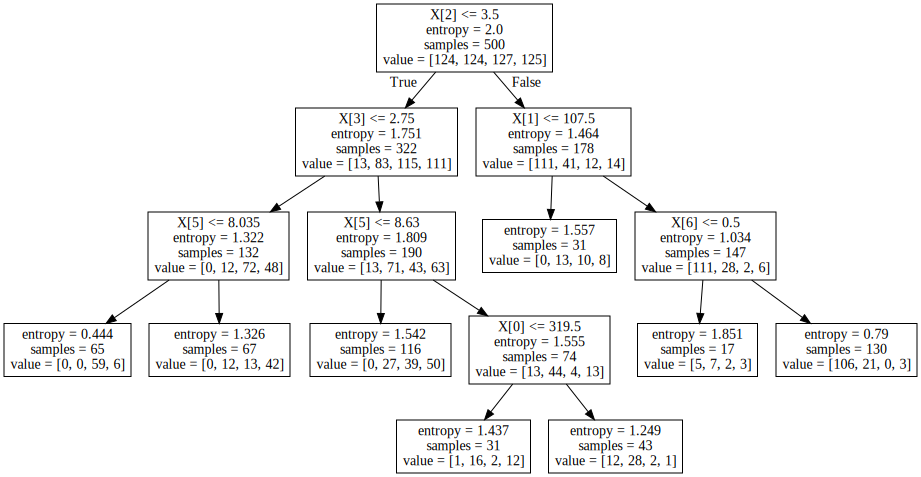

In [247]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("Graduate Data") 
graph

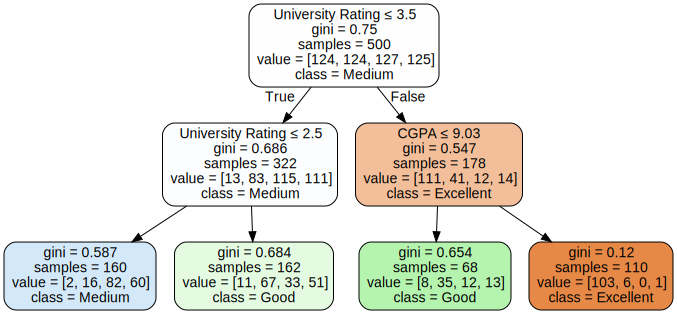

In [256]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X.columns,  
                     class_names=y.unique(),  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [248]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [249]:
y.unique()

array(['Excellent', 'Good', 'Medium', 'Low'], dtype=object)

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


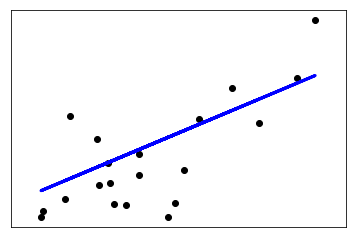

In [278]:


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [280]:
diabetes_y_test

array([233.,  91., 111., 152., 120.,  67., 310.,  94., 183.,  66., 173.,
        72.,  49.,  64.,  48., 178., 104., 132., 220.,  57.])

### Exploring unsupervised learning in this dataset

In [175]:
from sklearn.cluster import KMeans

In [176]:

# Declaring Model
model = KMeans(n_clusters=3)

# Fitting Model
model.fit(graduate_data)

# Predicitng a single input
#predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

# Prediction on the entire data
#all_predictions = model.predict(iris_df.data)

# Printing Predictions
#print(predicted_label)
#print(all_predictions)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

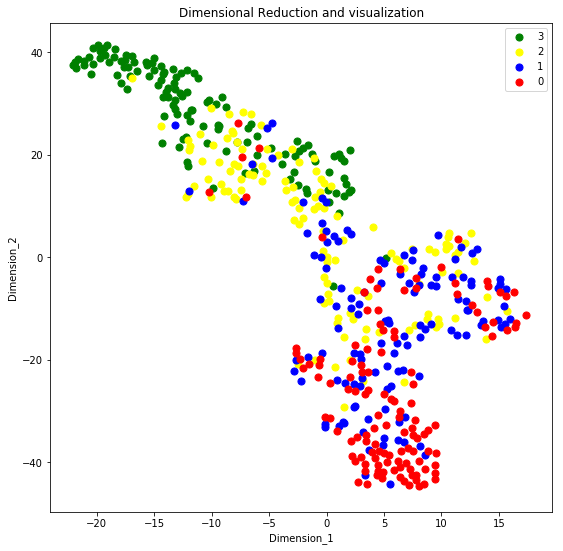

In [198]:

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Defining Model
model = TSNE(learning_rate=50)

# Fitting Model
transformed = model.fit_transform(graduate_data.iloc[:,0:7])

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

color_dict = {0: 'red', 1: 'blue', 2: 'yellow', 3: 'green'}

fig, ax = plt.subplots()
fig.set_size_inches(9,9)
for quartile in graduate_data['Admit_quartiles'].unique():
    index = graduate_data.index[graduate_data['Admit_quartiles']==quartile]
    ax.scatter(x_axis[index], y_axis[index], c = color_dict[quartile], label = quartile, s = 50)
ax.legend()
ax.set_xlabel("Dimension_1")
ax.set_ylabel("Dimension_2")
ax.set_title("Dimensional Reduction and visualization")
plt.show()